This notebook shows examples of how to use cratrcountr to make the standard plots from crater count data.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import pickle as pkl
from craterdata import *
%matplotlib inline

Load example synthetic data.

In [18]:
synth_area = 10000
synth_age = 2.0
d_min = 1.0
ds = np.loadtxt('data/example_synthetic.csv')

By convention, we store the data as numpy arrays of diameter in km.  Here is what ds looks like:

In [3]:
ds

array([1.06047394, 1.08517555, 1.09521656, 1.12849594, 1.22039382,
       1.23737119, 1.24022363, 1.31371149, 1.36301301, 1.39797692,
       1.42724983, 1.63493315, 1.70411932, 1.70411932, 1.95209073,
       2.09652478, 2.45753663, 3.1081359 , 3.66859694, 5.48908556])

Here's how to plot the full cumulative count.

<Figure size 640x480 with 0 Axes>

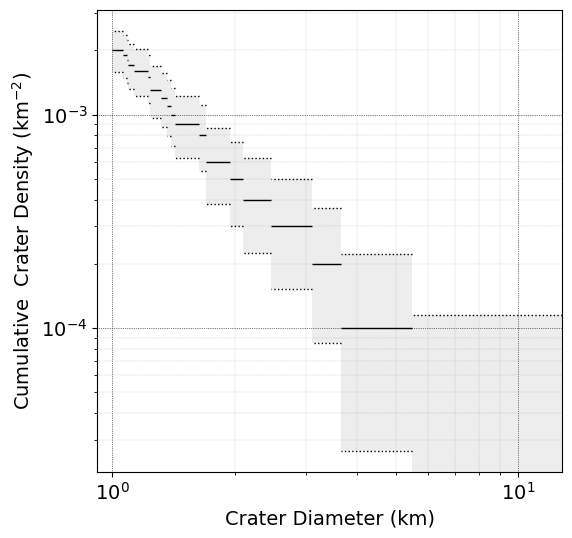

In [4]:
plot_cumulative_unbinned(ds, synth_area, d_min=d_min)

The parameter d_min gives the minimum diameter of craters counted.  If you don't specify d_min, then the last step will not be included, since it extends to d_min.  Effectively, the smallest crater will be treated as d_min.

<Figure size 640x480 with 0 Axes>

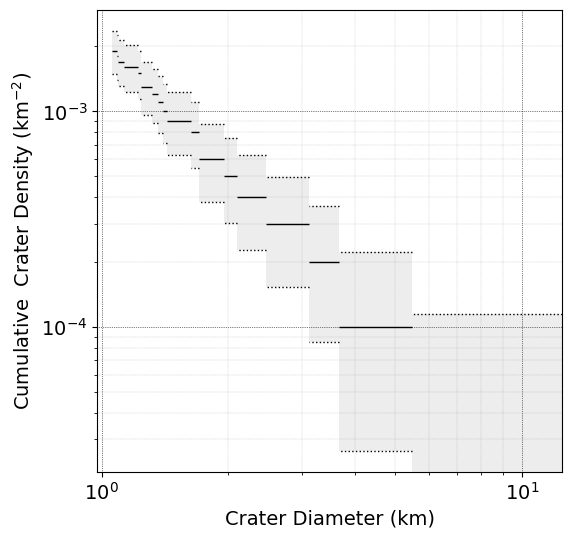

In [5]:
plot_cumulative_unbinned(ds, synth_area)

It can be modified extensively.  Here are its default parameters.

<Figure size 640x480 with 0 Axes>

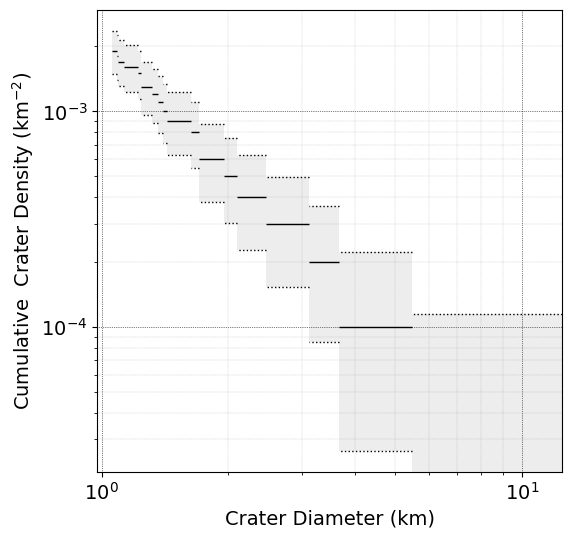

In [6]:
plot_cumulative_unbinned(
    ds, synth_area, color='black', alpha=1.0, plot_lines=True, ms=4,
    plot_points=False, plot_point_error_bars=False, point_color='same',
    center=False, d_min=None, d_max=10000, kind='log', fill_alpha=0.07,
    do_formatting=True, elinewidth=0.5, point_label=None
)

For instance, by default, it uses the log method error bars.  Here, we plot it with median method error bars, as well as a different color, shading alpha, and d_max.  We can also apply standard matplotlib commands.  Here, we change the title and x-axis (diameter axis) range.

Text(0.5, 1.0, 'With Median Method Error Bars')

<Figure size 640x480 with 0 Axes>

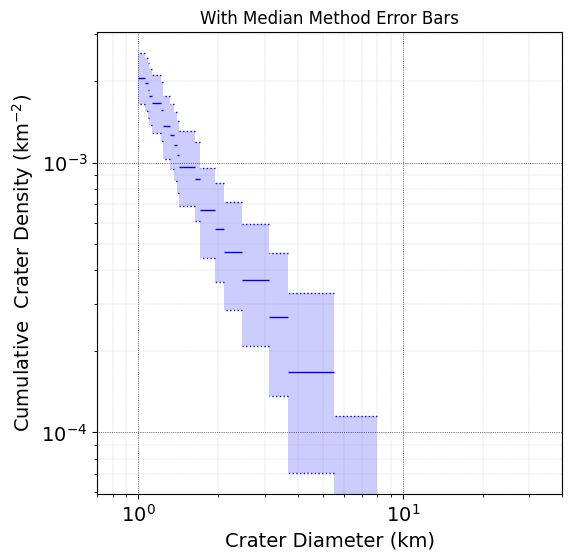

In [7]:
plot_cumulative_unbinned(
    ds, synth_area, d_min=d_min, kind='median', color='blue', 
    fill_alpha=0.2, d_max=8
)
plt.xlim([0.7, 40])
plt.title('With Median Method Error Bars')

To show the traditional form of the unbinned cumulative plot with points, as standardized by Arvidson et al. (1979), set plot_points=True, plot_point_error_bars=True, and plot_lines=False.

<Figure size 640x480 with 0 Axes>

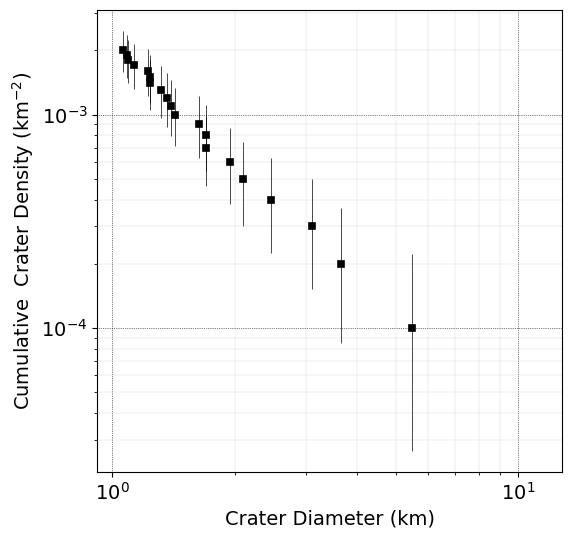

In [8]:
plot_cumulative_unbinned(
    ds, synth_area, d_min=d_min, plot_points=True, 
    plot_point_error_bars=True, plot_lines=False
)

We can also produce the Arvidson et al. (1979) "binned" plot, which samples the cumulative count function at regular intervals.  The craters to the right of the sampling point are often referred to as craters within the "bin."  Here, it is important to specify d_min.

<Figure size 640x480 with 0 Axes>

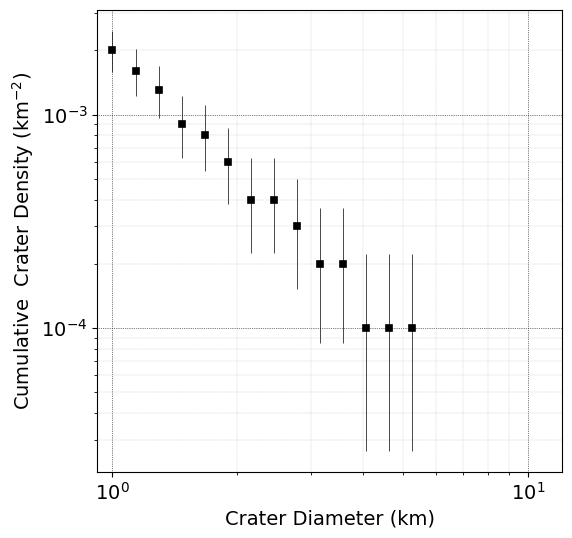

In [9]:
plot_cumulative_binned(ds, synth_area, d_min=d_min)

By default, it uses 18 "bins" per factor of ten.  For all binned plots, bins are specified with a bin_width_exponent parameter with a default base of 2.  If we want to use square root of two bins, for instance, we set bin_width_exponent=0.5.

(0.9, 13)

<Figure size 640x480 with 0 Axes>

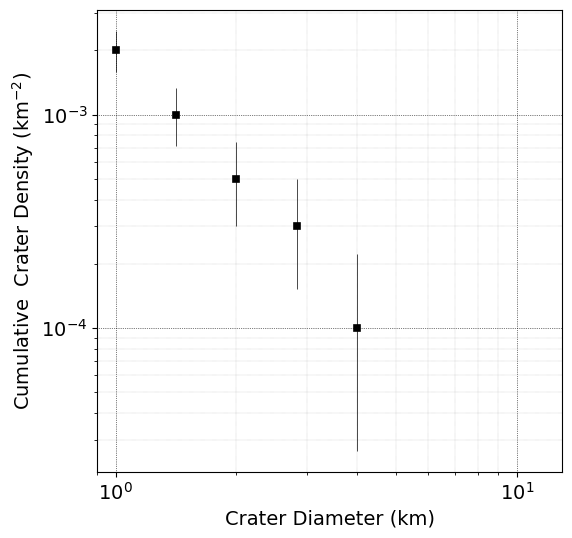

In [10]:
plot_cumulative_binned(
    ds, synth_area, d_min=d_min, bin_width_exponent=0.5
)
plt.xlim([0.9, 13])

By default, plot_cumulative_binned() samples the cumulative count function at regular intervals, but Arvidson et al. (1979) suggested adjusting the "bin" widths to avoid "bins" with no craters.  To reproduce this behavior, set skip_zero_crater_bins=True.

<Figure size 640x480 with 0 Axes>

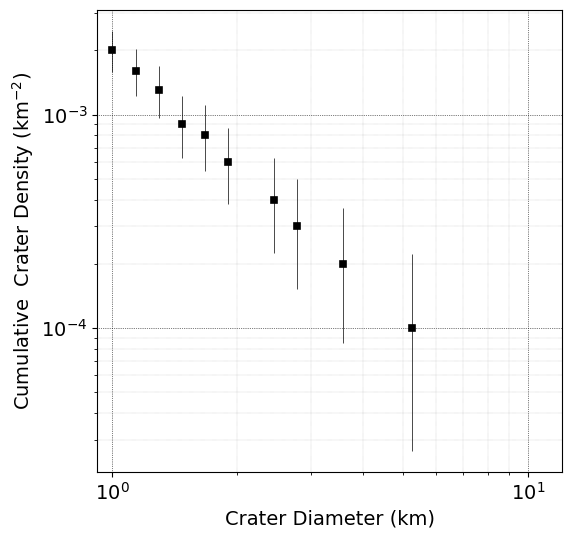

In [11]:
plot_cumulative_binned(
    ds, synth_area, d_min=d_min, skip_zero_crater_bins=True
)

Here's how to make a differential plot.  The differential plot shows the count in a bin divided by the bin width (in linear space).  Under the Arvidson et al. (1979) standards, is plotted against the linear mean of the bin edges.

<Figure size 640x480 with 0 Axes>

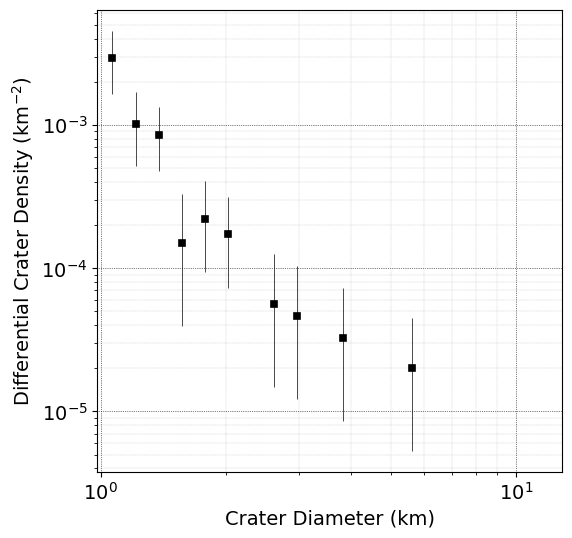

In [12]:
plot_differential(ds, synth_area, d_min=1.0)

Here's how to make an R plot, which is a differential plot normalized so that a cumulative slope of -2 is flat, with one minor difference: According to Arvidson et al. (1979), it is supposed to be plotted against the geometric mean of bin edges, not the linear mean.

<Figure size 640x480 with 0 Axes>

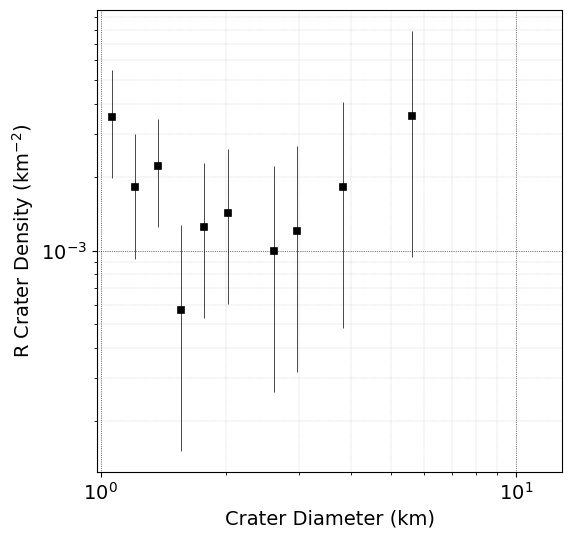

In [13]:
plot_R(ds, synth_area, d_min=d_min)

The difference in x-axis position is too minor to be clearly visible.  To see the difference, we can extract the point data with the fast_calc functions.

In [14]:
fast_calc_R(ds, synth_area, d_min=d_min), fast_calc_differential(ds, synth_area, d_min=d_min)

((array([1.0660505 , 1.21152766, 1.37685716, 1.56474814, 1.77827941,
         2.02094994, 2.29673618, 2.61015722, 2.96634884, 3.37114768,
         3.83118685, 4.35400465, 4.94816809, 5.62341325]),
  array([0.00352394, 0.00181667, 0.00221705, 0.00056998, 0.00124881,
         0.00142316, 0.        , 0.0009941 , 0.0012036 , 0.        ,
         0.00181977, 0.        , 0.        , 0.00355717])),
 (array([1.06823183, 1.21400667, 1.37967447, 1.5679499 , 1.78191809,
         2.02508517, 2.30143572, 2.61549807, 2.97241853, 3.37804566,
         3.83902616, 4.36291374, 4.95829295, 5.63491978]),
  array([2.90867285e-03, 1.02158708e-03, 8.49393815e-04, 1.48774746e-04,
         2.22073392e-04, 1.72419956e-04, 0.00000000e+00, 5.59022531e-05,
         4.61120565e-05, 0.00000000e+00, 3.23606595e-05, 0.00000000e+00,
         0.00000000e+00, 2.00034465e-05])))